In [1]:
import qcodes as qc
import broadbean as bb
import logging
import os
import tempfile
from sequence_builder import SequenceBuilder
from broadbean.plotting import plotter
from alazar_config import alazarconfigttwo
from alazar_config import alazarconfig
import numpy as np
import matplotlib.pyplot as plt
from qcodes.station import Station
from qcodes.utils.dataset.doNd import do0d, do1d
from qcodes import initialise_or_create_database_at, \
    load_or_create_experiment, Measurement, Parameter, \
    Station
from qcodes.dataset.plotting import plot_by_id


logging.basicConfig(level=logging.INFO)

In [2]:
db_path = os.path.join(tempfile.gettempdir(),
                       'data_access_example.db')
initialise_or_create_database_at(db_path)

experiment = load_or_create_experiment(
    experiment_name='alazar',
    sample_name='alazar-sample')

In [3]:
SC = qc.Station(config_file='Config.yaml')
AWGB = SC.load_instrument('awg5208')
seqbuild = SequenceBuilder(name = 'seqbuild', awg=AWGB)
SC.add_component(seqbuild)
alazar = SC.load_instrument('alazar')
#Salazarconfigttwo(alazar)
alazarconfig(alazar)
alazar_ctrl = SC.load_instrument('alazar_ctrl')
channelA = SC.load_instrument('channelA',parent=alazar_ctrl)
#channelA2 = SC.load_instrument('channelA2',parent=alazar_ctrl)
#channelA_phase = SC.load_instrument('channelA_phase',parent=alazar_ctrl)
#channelA_magnitude = SC.load_instrument('channelA_magnitude',parent=alazar_ctrl)
#channelA_real = SC.load_instrument('channelA_real',parent=alazar_ctrl)
#channelA_imag = SC.load_instrument('channelA_imag',parent=alazar_ctrl)
cavity = SC.load_instrument('rs_cavity')  
localos = SC.load_instrument('rs_localos')
qubit = SC.load_instrument('rs_qubit')
switch = SC.load_instrument('minicircuits_switch')  

c:\users\t2_2\miniconda3\envs\broadbean\lib\site-packages\qcodes\station.py:359: ValidationWarning: Additional properties are not allowed ('auto_reconnect_instrument' was unexpected)

Failed validating 'additionalProperties' in schema['properties']['instruments']['patternProperties']['^\\w+$']:
    {'additionalProperties': False,
     'properties': {'add_parameters': {'additionalProperties': False,
                                       'patternProperties': {'^(\\w+)(\\.\\w+)*$': {'additionalProperties': False,
                                                                                    'properties': {'initial_value': {},
                                                                                                   'inter_delay': {'type': 'number'},
                                                                                                   'label': {'type': 'string'},
                                                                                                   'l

Connected to: TEKTRONIX AWG5208 (serial:B020204, firmware:FV:6.1.0061.0) in 0.12s


c:\users\t2_2\miniconda3\envs\broadbean\lib\site-packages\qcodes\station.py:359: ValidationWarning: Additional properties are not allowed ('auto_reconnect_instrument' was unexpected)

Failed validating 'additionalProperties' in schema['properties']['instruments']['patternProperties']['^\\w+$']:
    {'additionalProperties': False,
     'properties': {'add_parameters': {'additionalProperties': False,
                                       'patternProperties': {'^(\\w+)(\\.\\w+)*$': {'additionalProperties': False,
                                                                                    'properties': {'initial_value': {},
                                                                                                   'inter_delay': {'type': 'number'},
                                                                                                   'label': {'type': 'string'},
                                                                                                   'l

Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/103079, firmware:3.1.19.7-3.20.140.60.1) in 0.04s


INFO:qcodes.instrument.base.com.visa:[rs_localos(RohdeSchwarz_SGS100A)] Opening PyVISA Resource Manager with default backend.
INFO:qcodes.instrument.base.com.visa:[rs_localos(RohdeSchwarz_SGS100A)] Opening PyVISA resource at address: TCPIP0::192.168.15.108::inst0::INSTR
INFO:qcodes.instrument.base:[rs_localos(RohdeSchwarz_SGS100A)] Connected to instrument: {'vendor': 'Rohde&Schwarz', 'model': 'SGS100A', 'serial': '1416.0505k02/103848', 'firmware': '3.1.19.15-3.20.347.26'}


Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/103848, firmware:3.1.19.15-3.20.347.26) in 0.04s


INFO:qcodes.instrument.base.com.visa:[rs_qubit(RohdeSchwarz_SGS100A)] Opening PyVISA Resource Manager with default backend.
INFO:qcodes.instrument.base.com.visa:[rs_qubit(RohdeSchwarz_SGS100A)] Opening PyVISA resource at address: TCPIP0::192.168.15.107::inst0::INSTR
INFO:qcodes.instrument.base:[rs_qubit(RohdeSchwarz_SGS100A)] Connected to instrument: {'vendor': 'Rohde&Schwarz', 'model': 'SGS100A', 'serial': '1416.0505k02/103078', 'firmware': '3.1.19.7-3.20.140.60.1'}


Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/103078, firmware:3.1.19.7-3.20.140.60.1) in 0.03s


INFO:qcodes.instrument.base:[minicircuits_switch(USB_SPDT)] Connected to instrument: {'vendor': 'Mini-Circuits', 'model': 'USB-4SPDT-A18', 'serial': '11608300052', 'firmware': 20}


Connected to: Mini-Circuits USB-4SPDT-A18 (serial:11608300052, firmware:20) in 0.11s


In [4]:
SC.seqbuild.readout_freq_1(6.6104e9)
print(SC.seqbuild.readout_freq_1())

6610400000.0


In [5]:
SC.seqbuild.cycle_time = 4e-6
SC.seqbuild.pulse_time = 0.6e-6
SC.seqbuild.readout_time = 1.5e-6
SC.seqbuild.marker_offset = 0e-9
SC.seqbuild.SR.set(1.5e9)


In [6]:
npts = 5
start = 4.5e3
stop = 5.0e6
SC.seqbuild.MultiQ_SSB_Spec_NoOverlap(start, stop, npts)

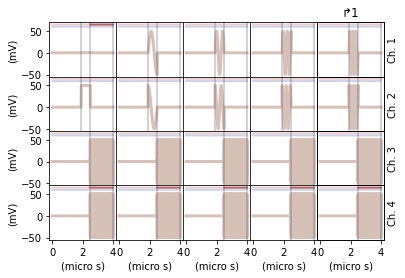

In [7]:
SC.seqbuild.seq.plot()

In [8]:
#SC.seqbuild.seq.plot_elem_nr(100)

In [9]:
SC.seqbuild.uploadToAWG()

Sequence uploaded in 1.0984203815460205 seconds


In [10]:
SC.seqbuild.runAWG()

In [11]:
SC.seqbuild.awg.run_state()

'Running'

In [12]:
print(SC.seqbuild.awg.ch1.state())
print(SC.seqbuild.awg.ch2.state())
print(SC.seqbuild.awg.ch3.state())
print(SC.seqbuild.awg.ch4.state())

1
1
1
1


In [13]:
#SC.seqbuild.awg.stop()

In [14]:
#prepare switches and instruments

switch.a(2)
switch.b(2)

#Turn Rohde and Schwarz boxes on and allow IQ modulation
cavity.status(1)  
cavity.IQ_state(1)
qubit.status(1)
qubit.IQ_state(1)


# set cavity and qubit power manually
USE_READOUT_FREQ = 6.6104e9
USE_DEMOD_FREQ = 20e6
USE_READOUT_POWER = -15
cavity.power(USE_READOUT_POWER)
qubit.power(-40)

cavity.frequency(USE_READOUT_FREQ - USE_DEMOD_FREQ) 
#pulse_builder.readout_freq_1(USE_READOUT_FREQ)

In [15]:

alazar_ctrl.int_delay(2e-7)
alazar_ctrl.int_time(0.5e-6)
alazar_ctrl.channels.append(channelA)

INFO:qdev_wrappers.alazar_controllers.ATSChannelController:need 200.0 samples round up to 256
INFO:qdev_wrappers.alazar_controllers.ATSChannelController:need 1700.0 samples round up to 1792


In [16]:
alazar.aux_io_mode()

'AUX_IN_AUXILIARY'

In [17]:
#alazar.clear_buffers()

In [18]:
#channelA.records_per_buffer(npts)
channelA.num_averages(1)

channelA.prepare_channel()

# Measure this 
#data1 = do0d(channelA.data)
#SC.seqbuild.runAWG()
#plot_by_id(data1[0].run_id)

In [19]:
channelA.data.get()

INFO:qdev_wrappers.alazar_controllers.alazar_multidim_parameters:calling acquire with {'samples_per_record': 1792, 'records_per_buffer': 1, 'buffers_per_acquisition': 1, 'allocated_buffers': 1}


array([0.27594628, 0.26500611, 0.2782906 , ..., 0.08644689, 0.05948718,
       0.07238095])

In [ ]:

alazar_ctrl.int_delay(0e-6)
alazar_ctrl.int_time(SC.seqbuild.pulse_time)
alazar_ctrl.channels.append(channelA_phase)
alazar_ctrl.channels.append(channelA_magnitude)
alazar_ctrl.channels.append(channelA_real)
alazar_ctrl.channels.append(channelA_imag)




In [ ]:
channelA_phase.records_per_buffer(npts)
channelA_phase.num_averages(8000)

channelA_phase.prepare_channel()
# Measure this 
data1 = do0d(channelA_phase.data)
#SC.seqbuild.runAWG()
plot_by_id(data1[0].run_id)

In [ ]:
channelA_magnitude.records_per_buffer(npts)
channelA_magnitude.num_averages(8000)

channelA_magnitude.prepare_channel()
# Measure this 
data1 = do0d(channelA_magnitude.data)
#SC.seqbuild.runAWG()
plot_by_id(data1[0].run_id)

In [ ]:
channelA_magnitude.data.get()

In [ ]:
from qcodes.dataset.data_set import load_by_id
data = load_by_id(102)

In [ ]:
dis = data.snapshot['station']['instruments']['seqbuild']['parameters']['seq']
snapseq = bb.Sequence().sequence_from_description(dis)
plotter(snapseq.element(50))

In [ ]:
dis

In [ ]:
channelA2.records_per_buffer(npts)
channelA2.num_averages(80)

channelA2.prepare_channel()
# Measure this 
data1 = do0d(channelA2.data)
#SC.seqbuild.runAWG()
plot_by_id(data1[0].run_id)

In [ ]:
stop = True

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
#fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
#ax.axis('equal')
#ax.set_aspect('equal', 'box')
stop = False
for i in range(100):
    if stop:
        break
    bla = channelA2.data.get()
    ax.clear()
    ax.imshow(bla)
    ax.set_aspect(aspect='auto')
    fig.canvas.draw()

In [ ]:
alazar.snapshot()

In [ ]:
RuntimeError                              Traceback (most recent call last)
<ipython-input-31-9c9172adecc5> in <module>
----> 1 channelA.data.get()

c:\users\t2_2\miniconda3\envs\broadbean\lib\site-packages\qcodes\instrument\parameter.py in get_wrapper(*args, **kwargs)
    590             except Exception as e:
    591                 e.args = e.args + (f'getting {self}',)
--> 592                 raise e
    593 
    594         return get_wrapper

c:\users\t2_2\miniconda3\envs\broadbean\lib\site-packages\qcodes\instrument\parameter.py in get_wrapper(*args, **kwargs)
    577             try:
    578                 # There might be cases where a .get also has args/kwargs
--> 579                 raw_value = get_function(*args, **kwargs)
    580 
    581                 value = self._from_raw_value_to_value(raw_value)

a:\scripts\rasmusbc\qdev-wrappers\qdev_wrappers\alazar_controllers\alazar_multidim_parameters.py in get_raw(self)
    141         output = self._instrument._parent._get_alazar().acquire(
    142             acquisition_controller=self._instrument._parent,
--> 143             **acq_kwargs)
    144         return output
    145 

c:\users\t2_2\miniconda3\envs\broadbean\lib\site-packages\qcodes\instrument_drivers\AlazarTech\ATS.py in acquire(self, mode, samples_per_record, records_per_buffer, buffers_per_acquisition, channel_selection, transfer_offset, external_startcapture, enable_record_headers, alloc_buffers, fifo_only_streaming, interleave_samples, get_processed_data, allocated_buffers, buffer_timeout, acquisition_controller)
    488                     self._handle,
    489                     ctypes.cast(buf.addr, ctypes.c_void_p),
--> 490                     buffer_timeout
    491                 )
    492 

c:\users\t2_2\miniconda3\envs\broadbean\lib\site-packages\qcodes\instrument_drivers\AlazarTech\ats_api.py in wait_async_buffer_complete(self, handle, buffer, timeout_in_ms)
    330                                    ) -> ReturnCode:
    331         return self._sync_dll_call(
--> 332             'AlazarWaitAsyncBufferComplete', handle, buffer, timeout_in_ms)
    333 
    334     signatures.update({"AlazarWaitAsyncBufferComplete": Signature(

c:\users\t2_2\miniconda3\envs\broadbean\lib\site-packages\qcodes\instrument_drivers\AlazarTech\dll_wrapper.py in _sync_dll_call(self, c_name, *args)
    211             *_normalize_params(*args)
    212         )
--> 213         return future.result()

c:\users\t2_2\miniconda3\envs\broadbean\lib\concurrent\futures\_base.py in result(self, timeout)
    433                 raise CancelledError()
    434             elif self._state == FINISHED:
--> 435                 return self.__get_result()
    436             else:
    437                 raise TimeoutError()

c:\users\t2_2\miniconda3\envs\broadbean\lib\concurrent\futures\_base.py in __get_result(self)
    382     def __get_result(self):
    383         if self._exception:
--> 384             raise self._exception
    385         else:
    386             return self._result

c:\users\t2_2\miniconda3\envs\broadbean\lib\concurrent\futures\thread.py in run(self)
     55 
     56         try:
---> 57             result = self.fn(*self.args, **self.kwargs)
     58         except BaseException as exc:
     59             self.future.set_exception(exc)

c:\users\t2_2\miniconda3\envs\broadbean\lib\site-packages\qcodes\instrument_drivers\AlazarTech\dll_wrapper.py in _api_call_task(lock, c_func, callback, *args)
     37         *args: Any) -> int:
     38     with lock:
---> 39         retval = c_func(*args)
     40     callback()
     41     return retval

c:\users\t2_2\miniconda3\envs\broadbean\lib\site-packages\qcodes\instrument_drivers\AlazarTech\dll_wrapper.py in _check_error_code(return_code, func, arguments)
     80                 ERROR_CODES[ReturnCode(return_code)],
     81                 func.__name__,
---> 82                 argrepr))
     83 
     84     return arguments

RuntimeError: ('error 579: ApiWaitTimeout: operation did not finish during timeout interval. Check your trigger. from function AlazarWaitAsyncBufferComplete with args: (1780, c_void_p(2369561034752), 1000)', 'getting alazar_ctrl_channelA_data')
